In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn import preprocessing
from sklearn.metrics import *

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

### PATHS

In [2]:
TRAIN = '../Data/df_train.csv'
TEST = '../Data/df_test.csv'

### FUNCTIONS

In [3]:
# code from exercise 5 to calculate the z-score
z_score = lambda x : (x - np.mean(x, axis=0)) / np.std(x, axis=0)

def conf_mat(y_hat, y_true):
    '''Returns a confusion matrix'''
    n = max(y_hat)+1
    bingo = np.zeros([n,n])
    for i in range(len(y_hat)):
        bingo[y_true[i]][y_hat[i]] +=1
    
    return(bingo)

def scores(y_hat, y_true, average = True):
    '''For each class, returns recall, precision and f1'''
    classes = list(np.unique(y_true))
    conf = conf_mat(y_hat, y_true)
    r = []
    p = []
    f = []
    for c in classes:
        recall = conf[c][c] / sum(conf[c])
        precision = conf[c][c] / sum(conf[:, c])
        f1 = 2*(precision*recall)/(precision + recall)
        r.append(recall)
        p.append(precision)
        f.append(f1)
    if average:
        return sum(r)/len(r), sum(p)/len(p), sum(f)/len(f)
    else:
        return (r, p, f)
    
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Function copied from exercise 7.
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [4]:
col = 'rainbow' # Colour theme

df = pd.read_csv(TRAIN) # Training dataframe
a = len(df)

# ensures data is without order, random state fixed for reproducability, frac=1 gives the whole df back but shuffled
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

if a != len(df):
    print('WARNING, DATA IS BEING LOST') # confirm still have the whole df

attributes = list(df.columns)[:-1] # Creates list of column names for the dataframe without the class

X = df[attributes].copy() # Attributes
y = df['type'].copy() # True values

for i in range(len(y)):
    if y[i] > 4:
        y[i] = y[i] - 2
    else:
        y[i] = y[i] - 1
        
lb = preprocessing.LabelBinarizer()
new_y = pd.DataFrame(lb.fit_transform(y))

y_list = y.unique() # 'y' values

#round(df.describe(),2)
df['type'] = y
df[[0,1,2,3,4,5]] = new_y

round(df[attributes].describe(),2) #There is a lot of variation, so being standardised will be needed for some models

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,1.52,13.42,2.72,1.43,72.62,0.49,8.92,0.20,0.06
std,0.00,0.86,1.42,0.51,0.78,0.57,1.51,0.55,0.10
min,1.51,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00
25%,1.52,12.93,2.28,1.17,72.28,0.13,8.22,0.00,0.00
50%,1.52,13.30,3.49,1.36,72.78,0.55,8.59,0.00,0.00
75%,1.52,13.83,3.61,1.62,73.05,0.61,9.14,0.00,0.11
max,1.53,17.38,3.98,3.50,75.41,6.21,16.19,3.15,0.37


In [5]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00
1,1.51627,13.00,3.58,1.54,72.83,0.61,8.04,0.00,0.00
2,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.00,0.09
3,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00
4,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.00,0.10


In [6]:
X.shape ## SMALL training set!!

(149, 9)

In [7]:
df[attributes] = z_score(df[attributes])
round(df[attributes].describe(),2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.27,-3.13,-1.92,-2.27,-3.61,-0.85,-2.32,-0.36,-0.63
25%,-0.56,-0.57,-0.31,-0.52,-0.44,-0.63,-0.47,-0.36,-0.63
50%,-0.23,-0.14,0.54,-0.15,0.20,0.11,-0.22,-0.36,-0.63
75%,0.23,0.48,0.62,0.37,0.55,0.22,0.14,-0.36,0.50
max,4.84,4.60,0.89,4.09,3.57,10.08,4.82,5.35,3.17


In [8]:
X = df[attributes].copy()
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,2.565103,-2.545930,-1.922352,-1.316840,0.751099,-0.854045,3.821565,-0.362309,-0.633117
1,-0.673512,-0.488702,0.603378,0.208615,0.264239,0.219743,-0.587138,-0.362309,-0.633117
2,-0.145715,0.092436,0.448165,0.386915,-0.876038,0.149331,-0.075888,-0.362309,0.291730
3,-0.576697,1.603395,-1.922352,1.100115,0.622978,-0.854045,-0.427787,2.738558,-0.633117
4,-0.617297,-0.023792,0.539882,0.168993,0.033621,0.325362,-0.560579,-0.362309,0.394491


In [9]:
count_dict = Counter(df['type'])
count_dict.most_common(6) #k-fold instead of using a validation set could help here as some have few samples.

[(1, 53), (0, 49), (5, 20), (2, 12), (3, 9), (4, 6)]

In [10]:
df[df['type']== 4] #very few samples compared to the others

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type,0,1,2,3,4,5
22,-1.697877,1.138484,-0.694763,0.208615,2.467920,-0.854045,-0.885920,-0.362309,-0.633117,4,0,0,0,0,1,0
39,-2.272520,4.602066,-1.922352,-2.168718,3.569760,-0.854045,-1.510044,-0.362309,-0.633117,4,0,0,0,0,1,0
48,0.141607,1.824227,-1.372053,0.604837,-0.158560,-0.854045,0.681028,-0.362309,-0.633117,4,0,0,0,0,1,0
56,0.229052,0.847915,-1.922352,1.298226,0.148930,-0.854045,1.298512,-0.362309,-0.633117,4,0,0,0,0,1,0
63,0.194699,0.673574,-0.236180,0.248237,-0.325118,-0.854045,0.428723,-0.362309,-0.633117,4,0,0,0,0,1,0
144,0.394575,1.324448,-1.922352,-1.732874,1.097025,-0.854045,1.524259,-0.362309,-0.633117,4,0,0,0,0,1,0


In [11]:
df[df['type']== 3] #also has relatively few samples.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type,0,1,2,3,4,5
7,1.643799,0.022699,-1.922352,0.287859,-0.517299,-0.290746,2.201499,-0.362309,-0.633117,3,0,0,0,1,0,0
18,-0.551713,-0.651420,-1.922352,0.783137,1.609509,0.853454,0.827100,-0.362309,-0.633117,3,0,0,0,1,0,0
49,-1.026418,0.685197,-0.031582,4.091592,-3.502518,2.103273,-2.027934,3.627110,-0.633117,3,0,0,0,1,0,0
67,-1.644785,-0.465456,-1.922352,3.180281,-2.746605,10.077468,-1.304216,-0.362309,-0.633117,3,0,0,0,1,0,0
87,0.225929,-0.802516,-0.617156,0.842570,0.084869,0.202140,0.773983,-0.362309,-0.633117,3,0,0,0,1,0,0
91,0.625681,-0.047037,-1.922352,-0.068741,-0.478863,-0.273143,2.374129,-0.362309,-0.633117,3,0,0,0,1,0,0
97,1.025433,-2.162379,-0.595991,0.248237,0.302675,-0.026700,1.650412,-0.362309,-0.633117,3,0,0,0,1,0,0
102,0.863034,-0.523570,-1.689533,0.149182,0.981716,-0.625205,1.557457,-0.362309,2.244186,3,0,0,0,1,0,0
141,0.962972,-2.778385,-0.715928,0.248237,1.045777,0.166934,1.789843,-0.362309,-0.633117,3,0,0,0,1,0,0


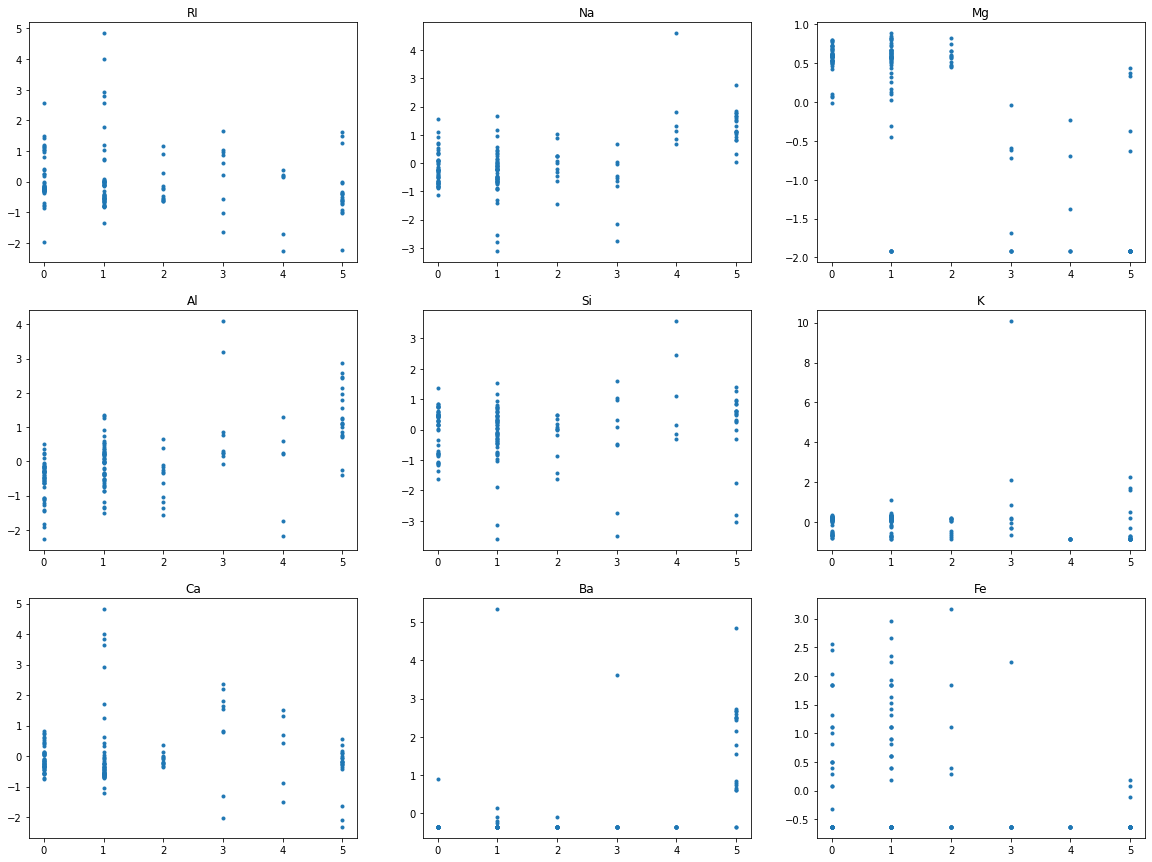

In [12]:
#visualise distributions by catagory and attribute
fig, ax = plt.subplots(3,3,figsize=(20,15))

for i in range(len(attributes)):
    plt.subplot(3,3,i+1)
    plt.scatter(df['type'], X[attributes[i]], marker='.')
    plt.title(f'{attributes[i]}');
    
#plt.savefig('../Vis/attribute_distributions');

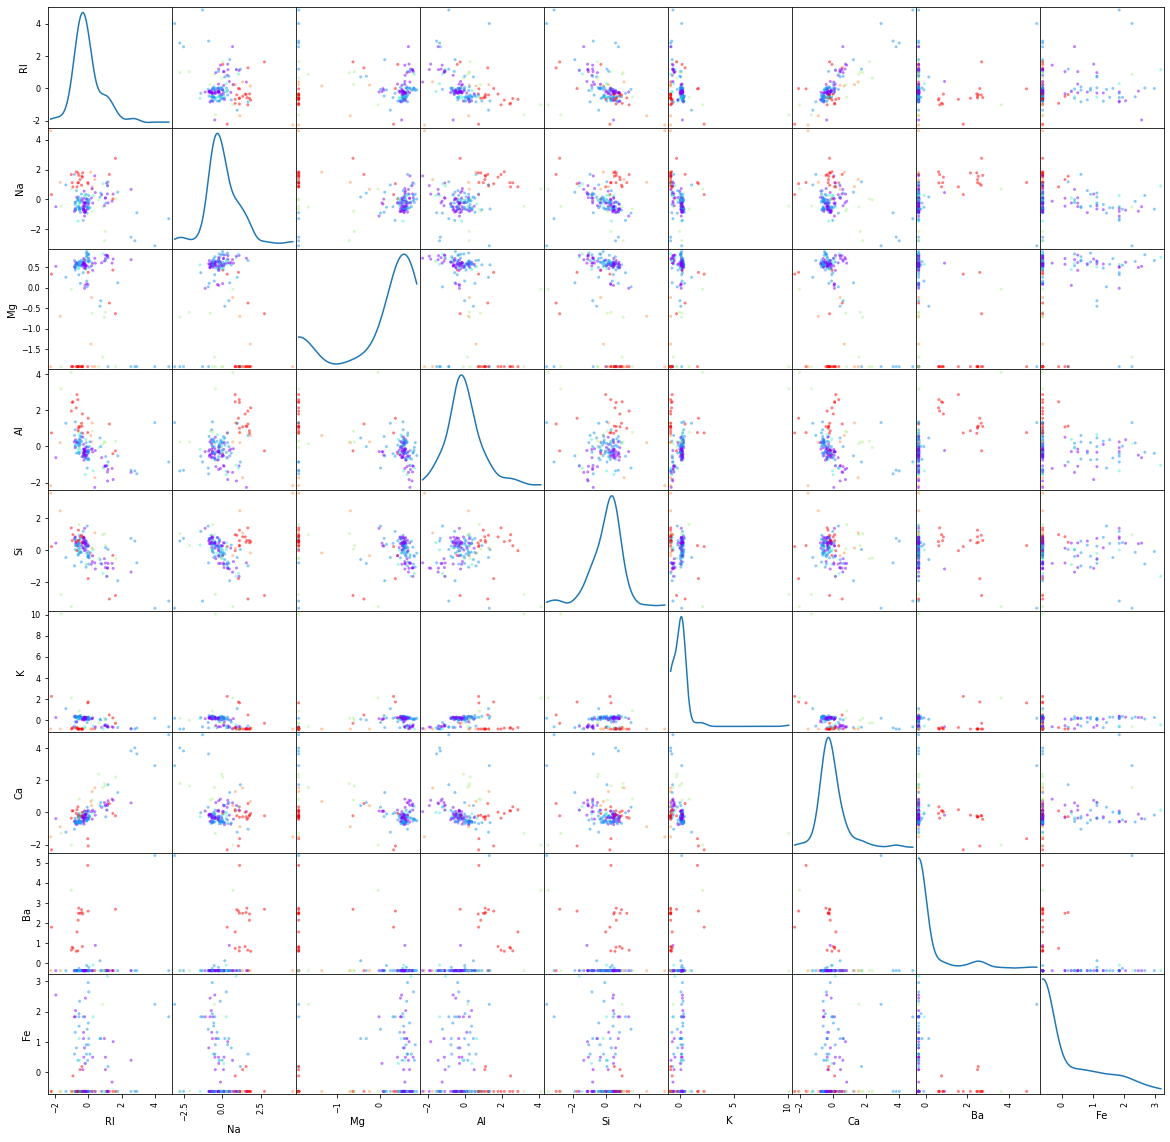

In [13]:
pd.plotting.scatter_matrix(X, c=y, figsize=(20,20), diagonal='kde', cmap=col);

#plt.savefig('../Vis/early_plot');

### Consider using PCA to find more useful components

In [14]:
pca = PCA(n_components=9)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X))

print(pca.explained_variance_ratio_, '\n')
pca_exp = pca.explained_variance_ratio_
s = 0
c = 1
for i in pca_exp:
    s += i
    print(f'{c} components explain {round(100*s,2)}% of the data')
    c+=1

[2.82231856e-01 2.30404087e-01 1.64196203e-01 1.17150428e-01
 1.02153806e-01 5.53756625e-02 4.16823996e-02 6.62823259e-03
 1.77325748e-04] 

1 components explain 28.22% of the data
2 components explain 51.26% of the data
3 components explain 67.68% of the data
4 components explain 79.4% of the data
5 components explain 89.61% of the data
6 components explain 95.15% of the data
7 components explain 99.32% of the data
8 components explain 99.98% of the data
9 components explain 100.0% of the data


In [15]:
round(X_pca.describe(),2)

,0,1,2,3,4,5,6,7,8
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.60,1.44,1.22,1.03,0.96,0.71,0.61,0.25,0.04
min,-4.87,-1.96,-5.35,-2.67,-2.95,-2.98,-1.53,-0.98,-0.07
25%,-0.64,-0.95,-0.39,-0.54,-0.69,-0.37,-0.29,-0.10,-0.02
50%,-0.08,-0.60,-0.00,-0.08,0.36,-0.11,0.00,-0.01,-0.00
75%,0.60,0.55,0.31,0.51,0.67,0.27,0.28,0.10,0.02
max,6.94,5.81,8.09,3.58,3.26,4.24,2.85,1.17,0.29


In [16]:
X_pca = z_score(X_pca)
round(X_pca.describe(),2)

,0,1,2,3,4,5,6,7,8
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.05,-1.36,-4.40,-2.60,-3.07,-4.21,-2.50,-4.01,-1.73
25%,-0.40,-0.66,-0.32,-0.53,-0.72,-0.52,-0.47,-0.42,-0.58
50%,-0.05,-0.42,-0.00,-0.08,0.37,-0.16,0.00,-0.05,-0.04
75%,0.38,0.38,0.25,0.50,0.70,0.38,0.46,0.39,0.43
max,4.35,4.04,6.65,3.49,3.40,6.00,4.66,4.78,7.27


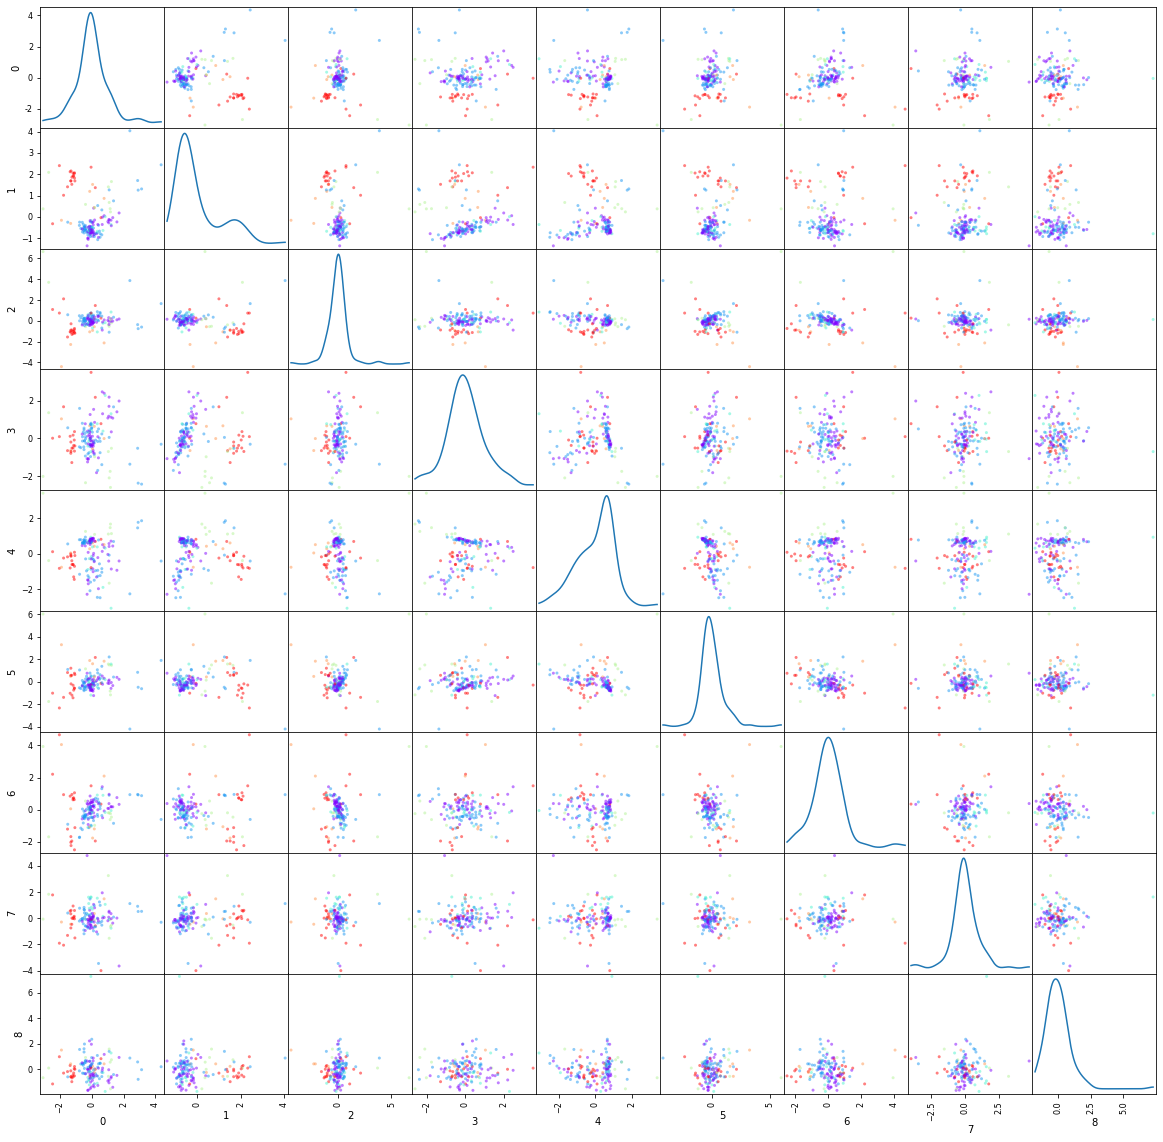

In [17]:
pd.plotting.scatter_matrix(X_pca, c=y, figsize=(20,20), diagonal='kde', cmap=col);
#plt.savefig('../Vis/EDE_PCA');

In [18]:
df_pca = pd.concat([pd.DataFrame(X_pca),pd.DataFrame(y)], axis=1)

df_pca.head(5)

,0,1,2,3,4,5,6,7,8,type
0,2.914298,1.252779,-0.753760,-2.375862,1.757890,-0.504786,0.920272,0.507419,-0.788827,1
1,-0.454181,-0.639287,0.049524,-0.130421,0.701075,-0.566992,-0.443567,0.406410,1.973246,1
2,-0.021837,-0.175093,0.622692,0.432682,-0.171357,0.444104,-1.019730,0.834604,-0.254093,2
3,-1.352332,2.112713,-1.064125,0.105771,-0.810292,-1.037096,0.843927,0.532253,0.294695,5
4,-0.381220,-0.617763,0.254892,-0.024628,-0.299917,0.234639,-0.322532,0.234145,-0.345169,1
